In [3]:
using PyPlot

In [162]:
# return lorenz dynamics f(x) for parameters σ, β, ρ
function lorenz_f(σ, β, ρ)
    return x -> [σ*(x[2]-x[1]); x[1]*(ρ-x[3]) - x[2]; x[1]*x[2] - β*x[3]]
end

# return linearized lorenz dynamics Df(x) for parameters σ, β, ρ
function lorenz_Df(σ, β, ρ)
     return x-> [ -σ      σ    0;  ρ-x[3]  -1  -x[1]; x[2]   x[1]  -β]
end

# define simple 4th-order runge-kutta integrator
function rk4(f, x₀, tspan)
    x = zeros(length(tspan), length(x₀))
    x[1,:] = x₀
    
    for n=1:length(tspan)-1
        xₙ = x[n,:]
        dt = tspan[n+1] - tspan[n]
        k₁ = f(xₙ)
        k₂ = f(xₙ + k₁*dt/2)
        k₃ = f(xₙ + k₂*dt/2)
        k₄ = f(xₙ + k₃*dt)
        x[n+1,:] = xₙ + dt/6 * (k₁ + 2k₂ + 2k₃ + k₄)
    end
    return tspan,x    
end


function equilibria(σ, β, ρ)
    eqbs = zeros(3,3)
    @show ρ
    if ρ <= 1
        eqbs = zeros(3,1)
    else
        eqbs = zeros(3,3)
        eqbs[:,2] = [ sqrt(β*(ρ-1));  sqrt(β*(ρ-1)); ρ-1]
        eqbs[:,3] = [-sqrt(β*(ρ-1)); -sqrt(β*(ρ-1)); ρ-1]
    end
    return eqbs
end

# in-place sort by real part of eigenvalues
function eigsort(λ, V)
    n = length(λ)
    # dumb sort 
    for i = 1:n-1
        for j = i+1:n
            if real(λ[i]) < real(λ[j])
                vtmp = V[:,i]
                V[:,i] = V[:,j]
                V[:,j] = vtmp
                ltmp = λ[i]
                λ[i] = λ[j]
                λ[j] = ltmp
            end
        end
    end
    λ,V
end

function lorenzplot(σ, β, ρ, T)

    # get lorenz dynamics f(x), linearized dynamics Df(x), and eqbs for σ, β, ρ
    f  = lorenz_f(σ, β, ρ)
    Df = lorenz_Df(σ, β, ρ)
    eq = equilibria(σ, β, ρ)
    
    # plot equilibria with black dots
    plot3D(eq[1,:], eq[2,:], eq[3,:], "ko");
    
    t = zeros(2)
    xunstable = zeros(3,2)
    
    # plot eigenvectors of eqbs: stable in blue, unstable in red
    for n = 1:size(eq,2)
        λ,V = eig(Df(eq[:,n]))
        eigsort(λ, V)
    
        for k = 1:length(λ)
            
            color1 = real(λ[k]) > 0 ? "r-" : "b-"
            color2 = real(λ[k]) > 0 ? "r--" : "b--"
            vlength = 4.0
            
            if isreal(λ[k])              
                X = zeros(3,2)
                X[:,1] = eq[:,n]
                X[:,2] = eq[:,n] + vlength*V[:,k]
                plot3D(X[1,:], X[2,:], X[3,:], color1)
                X[:,2] = eq[:,n] - vlength*V[:,k]
                plot3D(X[1,:], X[2,:], X[3,:], color2)
            else
                @show λ[k]
            end
        end
        
        dt = 0.01
        if n==1
            t, xunstable   = rk4(f, eq[:,n] + V[:,1], 0:dt:T)
            plot3D(xunstable[:,1], xunstable[:,2], xunstable[:,3], "r-")
            
            t, xunstable   = rk4(f, eq[:,n] - V[:,1], 0:dt:T)
            plot3D(xunstable[:,1], xunstable[:,2], xunstable[:,3], "m-")
            
            t, x = rk4(f, [-20; -20; 50], 0:0.002:T)
            plot3D(x[:,1], x[:,2], x[:,3], "k-")
        end
        
        
    end
    xlim(-30,30)
    ylim(-30,30)
    zlim(0,60)
    xlabel("x")
    ylabel("y")
    zlabel("z")
    
    t, xunstable
end
                  


lorenzplot (generic function with 1 method)

In [ ]:
g = lorenzdynamics(σ, β, ρ)
g([0 0 0])

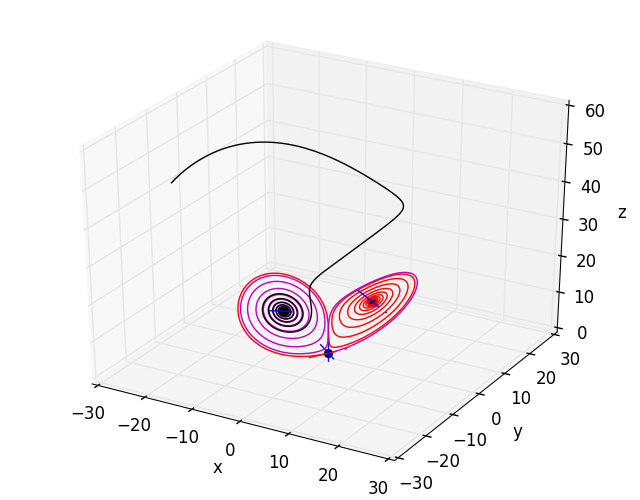

ρ = 13.94
λ[k] = -0.39720924213232145 + 7.311379687023694im
λ[k] = -0.39720924213232145 - 7.311379687023694im
λ[k] = -0.39720924213232145 + 7.311379687023694im
λ[k] = -0.39720924213232145 - 7.311379687023694im


In [174]:
clf()
t,x = lorenzplot(10, 8/3, 13.94, 10);

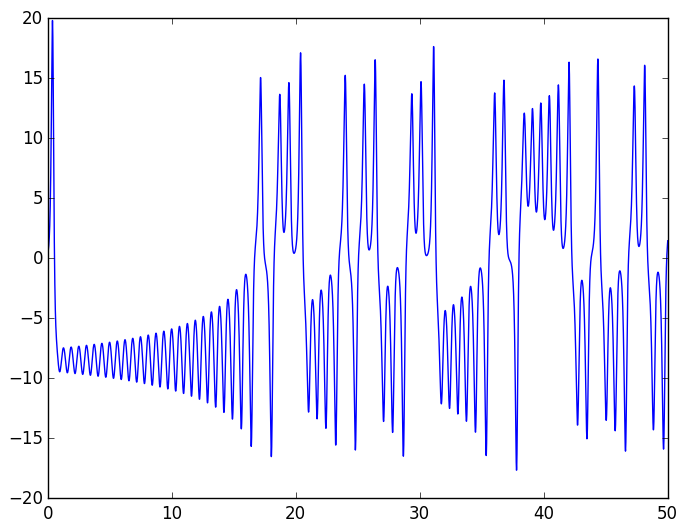

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb57e998c50>

In [127]:
plot(t,x[:,1])